<a href="https://colab.research.google.com/github/dp1706/Machine-Learning/blob/master/Assignment3/ML_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                                      ***Assignment 3***  

# **Required Modules**

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
print("True")

True


#**Single linear Regression(One Feature)**

In [ ]:
#Uploading file
from google.colab import files
uploaded = files.upload()

Saving slr06.xls to slr06.xls


*** No CODEPAGE record, no encoding_override: will use 'ascii'
     X      Y
0  108  392.5
1   19   46.2
2   13   15.7
3  124  422.2
4   40  119.4
5   57  170.9
6   23   56.9
7   14   77.5
8   45  214.0
9   10   65.3


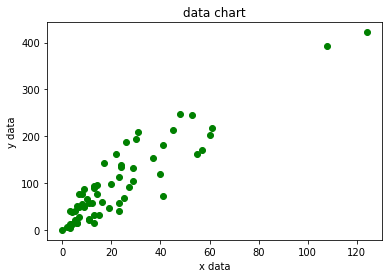

In [ ]:
#Reading XLS file usinf Dataframe
df=pd.read_excel('slr06.xls')
print(df.head(10))
plt.scatter(df['X'],df['Y'],color='green')
plt.title('data chart')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

**1)Splitting data into train(60%),test(20%) and validation(20%)**

In [ ]:
#Splitting data
df_train, df_test = train_test_split(
    df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(
    df_train, test_size=0.25, random_state=1)
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(37, 2)
(13, 2)
(13, 2)


**2)Printing train ,test and validation  accurracy**

* Using OLS method

In [ ]:
#OLS algorithm
def OLS(X,Y):
  n = len(X)
  x_mean = np.mean(X)
  y_mean = np.mean(Y)
  num, den = 0, 0
  for i in range(0, n) :
    num += (X[i] - x_mean) * (Y[i] - y_mean)
    den += (X[i] - x_mean) ** 2
  #Calculate the values of the slope and y-intercept 
  m = num / den
  c = y_mean - m * x_mean
  return m, c

In [ ]:
#slope and Const

slope,const=OLS(X_train,Y_train)
print(slope)
print(const)

3.423058688500003
19.88311242406749


In [ ]:
# Function to Calculate Mean Absolute Error
def MAE(m, c, X, Y) :
  mae, n = 0, len(X)
  for i in range(n):
    y_pred = m * X[i] + c
    mae += abs(Y[i] - y_pred)
  mae =mae/n
  return mae

NOTE:  *Lower MAE value means higher accuracy*

In [ ]:
#train set accuracy
X_train = df_train['X'].to_numpy()
Y_train = df_train['Y'].to_numpy()
print("OLS Traning MAE : %f"  %(MAE(slope, const, X_train, Y_train)))

#validation set accuracy
X_val = df_val['X'].to_numpy()
Y_val = df_val['Y'].to_numpy()
print("OLS Validation MAE : %f " %(MAE(slope, const, X_val, Y_val)))

#test set accuracy
X_test = df_test['X'].to_numpy()
Y_test = df_test['Y'].to_numpy()
print("OLS Test MAE : %f " %(MAE(slope, const, X_test, Y_test)))

OLS Traning MAE : 28.995700
OLS Validation MAE : 31.453019 
OLS Test MAE : 24.028889 


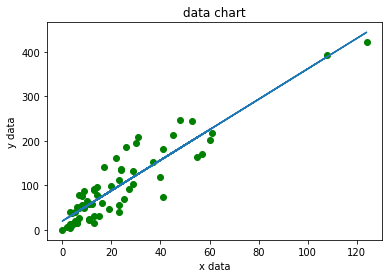

In [ ]:
#Ploting line with m and c
plt.plot(df['X'],slope*df['X']+const)
plt.scatter(df['X'],df['Y'],color='green')
plt.title('data chart')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

 * Using Gradient Descent Algorithm

In [ ]:
# Gradient Descent Algorithm
def GDA(X, Y) :
  n = len(X)
  rate, iters = 0.0001, 10000
  m, c = 0, 0
  for i in range(iters) :
    Y_pred = m * X + c
    d_dm = (-2 / n) * (sum(X * (Y - Y_pred)))
    d_dc = (-2 / n) * (sum(Y - Y_pred))
    m -= rate * d_dm
    c -= rate * d_dc
  return m, c

In [ ]:
#slope and Const

GDA_slope,GDA_const=GDA(X_train,Y_train)
print(slope)
print(const)

3.423058688500003
19.88311242406749


In [ ]:
# Function to Calculate Mean Absolute Error
def MAE(m, c, X, Y) :
  mae, n = 0, len(X)
  for i in range(n):
    y_pred = m * X[i] + c
    mae += abs(Y[i] - y_pred)
  mae =mae/n
  return mae

In [ ]:
#train set accuracy
X_train = df_train['X'].to_numpy()
Y_train = df_train['Y'].to_numpy()
print("OLS Traning MAE : %f"  %(MAE(GDA_slope, GDA_const, X_train, Y_train)))

#validation set accuracy
X_val = df_val['X'].to_numpy()
Y_val = df_val['Y'].to_numpy()
print("OLS Validation MAE : %f " %(MAE(GDA_slope, GDA_const, X_val, Y_val)))

#test set accuracy
X_test = df_test['X'].to_numpy()
Y_test = df_test['Y'].to_numpy()
print("OLS Test MAE : %f " %(MAE(GDA_slope, GDA_const, X_test, Y_test)))

OLS Traning MAE : 29.495872
OLS Validation MAE : 32.968151 
OLS Test MAE : 23.704197 


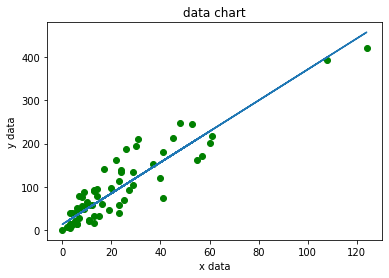

In [ ]:
#ploting line with m and c
plt.plot(df['X'],GDA_slope*df['X']+GDA_const)
plt.scatter(df['X'],df['Y'],color='green')
plt.title('data chart')
plt.xlabel('x data')
plt.ylabel('y data')
plt.show()

#**Multiple Linear Regression**

* **Using the Gradient Descent
Algorithm**

In [ ]:
#Loding data
boston= load_boston()
boston_data=pd.DataFrame(boston.data,columns=boston.feature_names)
print(boston_data)
Y_boston = boston.target
X_boston = boston.data

        CRIM    ZN  INDUS  CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31   0.0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07   0.0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18   0.0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...   ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93   0.0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[506 rows x 13 columns]


**1)Splitting Dataset into Train(60%) , Test(20%) and validation(20%)**

In [ ]:
#Splitting dataset into Train,Test and Validation

X_train_boston, X_test_boston,Y_train_boston, Y_test_boston = train_test_split(
    X_boston,Y_boston, test_size=0.2, random_state=1)
X_train_boston, X_val_boston,Y_train_boston, Y_val_boston = train_test_split(
    X_train_boston,Y_train_boston, test_size=0.2, random_state=1)
print(X_train_boston.shape)
print(X_test_boston.shape)
print(X_val_boston.shape)
print(Y_train_boston.shape)
print(Y_test_boston.shape)
print(Y_val_boston.shape)

(323, 13)
(102, 13)
(81, 13)
(323,)
(102,)
(81,)


**2)Printing Train , Test and Validation Accuracy**

In [ ]:
# Standardising Data
scaler = StandardScaler()
x_train_boston = scaler.fit_transform(X_train_boston)
x_val_boston = scaler.fit_transform(X_val_boston)
x_test_boston = scaler.fit_transform(X_test_boston)
#print(x_train_boston)

In [ ]:
# Converting Back to Data Frames
train_data_boston = pd.DataFrame(x_train_boston)
train_data_boston['price'] = Y_train_boston
print(train_data_boston.shape)

validate_data_boston = pd.DataFrame(x_val_boston)
validate_data_boston['price'] = Y_val_boston
print(validate_data_boston.shape)

test_data_boston = pd.DataFrame(x_test_boston)
test_data_boston['price'] = Y_test_boston
print(test_data_boston.shape)

(323, 14)
(81, 14)
(102, 14)


In [ ]:
# Multiple Linear Regression Gradient Descent Algorithm
def MLR_GDA(data, learning_rate, iters, sample_size) :
  w = np.zeros(shape = (1, data.shape[1] - 1))
  b = 0
  for iter in range(iters) :
    sample_data = data.sample(sample_size)
    y = np.array(sample_data['price'])
    x = np.array(sample_data.drop('price', axis = 1))
    w_g = np.zeros(shape = (1, data.shape[1] - 1))
    b_g = 0

    for i in range(sample_size) :
      y_pred = np.dot(w, x[i]) + b
      w_g += (-2) * (x[i]) * (y[i] - y_pred)
      b_g += (-2) * (y[i] - y_pred)
    w -= (learning_rate) * (w_g / sample_size)
    b -= (learning_rate) * (b_g / sample_size)
  return w, b

In [ ]:
# Function to Calculate Mean Absolute Error
def MAE_MLR(w, b, X, Y) :
  mae, n = 0, len(X)
  for i in range(n):
    y_pred = np.dot(w, X[i]) + b
    mae += abs(Y[i] - y_pred)
  mae = mae/n
  return mae

In [ ]:
# Training Model
w, b = MLR_GDA(train_data_boston, 0.001, 1000, 10)
print(w)
print(b)

[[-0.72872394  0.44552752 -0.20535714  0.91220713 -0.74370322  2.56074988
  -0.31233496 -1.23298131  0.29260996 -0.09996832 -1.69004745  0.63348623
  -3.09668196]]
[19.5756716]


In [ ]:
# Printing MAE Values
#For Train Set
y = np.array(train_data_boston['price'])
x = np.array(train_data_boston.drop('price', axis = 1))
print("Train MAE : %f" %(MAE_MLR(w, b, x, y)))

#For Validation Set
y = np.array(validate_data_boston['price'])
x = np.array(validate_data_boston.drop('price', axis = 1))
print("Validate MAE : %f" %(MAE_MLR(w, b, x, y)))

#For test Set
y = np.array(test_data_boston['price'])
x = np.array(test_data_boston.drop('price', axis = 1))
print("Test MAE : %f" %(MAE_MLR(w, b, x, y)))

Train MAE : 3.898094
Validate MAE : 3.263677
Test MAE : 3.948348
